In [71]:
import numpy as np
import torch
import pandas as pd
from models.Model import MyGP
from models.Functions import sort, getAnswer, get_yield
from models.AdaptiveSampling import AdaptiveSampling
from models.FeatureSelection import FeatureSelection

In [72]:
# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [73]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [74]:
seed = 123456789
torch.manual_seed(seed=seed)

In [75]:
initial_num_train = 500

In [76]:
filePath = "benchmark/data.csv"

In [77]:
df = pd.read_csv(filePath)
data_dim = 12
total_num = 100000
data = np.array(df)
data = data[:,:data_dim + 1]
test_x_origin = data[:total_num, 1:]
test_y_origin = data[:total_num, 0]

In [78]:
data_dim_out = 2

In [79]:
train_x = test_x_origin[:initial_num_train, :]
train_y = test_y_origin[:initial_num_train]

train_x =torch.tensor(train_x, dtype=torch.float32)
train_y =torch.tensor(train_y, dtype=torch.float32)

test_x = torch.tensor(test_x_origin, dtype=torch.float32)
test_y = torch.tensor(test_y_origin, dtype=torch.float32)

In [80]:
answer = sort(test_y, 50)
threshold = test_y[answer[50 - 1]]

In [81]:
threshold

tensor(4.1429)

In [82]:
featureSelector = FeatureSelection()
featureSelector.fit(train_x.numpy(), train_y.numpy(), num = 8)
select_dim = featureSelector.get_dim()
mask = featureSelector.get_mask()
print(f"[SELECT DIM] : {select_dim}")

Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Gaussian kernel for the outcomes.
[SELECT DIM] : 8


In [83]:
yield_mc = get_yield(test_y, threshold)
print(f"[Real Yield]: {yield_mc}")

[Real Yield]: 0.9995


In [84]:
model = MyGP(train_x[:, mask], train_y, data_dim=select_dim, data_dim_out=data_dim_out, training_iterations=50)
model.train()
pred_y, _ = model.test(test_x=test_x[:, mask])

100%|██████████| 50/50 [00:00<00:00, 78.33it/s]


In [85]:
yield_result = []
id_list = []

In [86]:
yield_gp = get_yield(pred_y, threshold)
yield_result.append(yield_gp)
print(f"[Yield]: {yield_gp}")

[Yield]: 1.0


In [87]:
epoch = 20
bias = 2500
N = 50
for i in range(epoch):
    print(f"[EPOCH] : {i + 1}")
    start = initial_num_train + i * bias
    end = start + bias
    adaptiveSampling = AdaptiveSampling(model=model, mask=mask, train_x=test_x[start:end,:], N=N, threshold=threshold)
    x_new, indeces, entropy = adaptiveSampling.get_initial_set()
    indeces += start
    y_new = test_y[indeces]
    train_x = torch.vstack([train_x, x_new])
    train_y = torch.hstack([train_y, y_new])
    model = MyGP(train_x[:,mask], train_y, data_dim=select_dim, data_dim_out=data_dim_out, training_iterations=50)
    model.train()
    pred_y, _ = model.test(test_x=test_x[:, mask])
    yield_gp = get_yield(pred_y, threshold)
    print(f"[Yield]: {yield_gp}")
    yield_result.append(yield_gp)
    

[EPOCH] : 1
initial finished


100%|██████████| 50/50 [00:00<00:00, 122.10it/s]


[Yield]: 0.9997
[EPOCH] : 2
initial finished


100%|██████████| 50/50 [00:00<00:00, 119.27it/s]


[Yield]: 0.99957
[EPOCH] : 3
initial finished


100%|██████████| 50/50 [00:00<00:00, 120.77it/s]


[Yield]: 0.99959
[EPOCH] : 4
initial finished


100%|██████████| 50/50 [00:00<00:00, 84.87it/s]


[Yield]: 0.99957
[EPOCH] : 5
initial finished


100%|██████████| 50/50 [00:00<00:00, 77.94it/s]


[Yield]: 0.99959
[EPOCH] : 6
initial finished


100%|██████████| 50/50 [00:00<00:00, 88.72it/s]


[Yield]: 0.99953
[EPOCH] : 7
initial finished


100%|██████████| 50/50 [00:01<00:00, 43.69it/s]


[Yield]: 0.99954
[EPOCH] : 8
initial finished


100%|██████████| 50/50 [00:01<00:00, 42.46it/s]


[Yield]: 0.99959
[EPOCH] : 9
initial finished


100%|██████████| 50/50 [00:01<00:00, 46.63it/s]


[Yield]: 0.99957
[EPOCH] : 10
initial finished


100%|██████████| 50/50 [00:01<00:00, 45.62it/s]


[Yield]: 0.99952
[EPOCH] : 11
initial finished


100%|██████████| 50/50 [00:01<00:00, 45.11it/s]


[Yield]: 0.99956
[EPOCH] : 12
initial finished


100%|██████████| 50/50 [00:01<00:00, 45.54it/s]


[Yield]: 0.99955
[EPOCH] : 13
initial finished


100%|██████████| 50/50 [00:01<00:00, 35.19it/s]


[Yield]: 0.99955
[EPOCH] : 14
initial finished


100%|██████████| 50/50 [00:01<00:00, 46.11it/s]


[Yield]: 0.99949
[EPOCH] : 15
initial finished


100%|██████████| 50/50 [00:01<00:00, 38.59it/s]


[Yield]: 0.99952
[EPOCH] : 16
initial finished


100%|██████████| 50/50 [00:01<00:00, 44.96it/s]


[Yield]: 0.99952
[EPOCH] : 17
initial finished


100%|██████████| 50/50 [00:01<00:00, 43.93it/s]


[Yield]: 0.99947
[EPOCH] : 18
initial finished


100%|██████████| 50/50 [00:01<00:00, 45.14it/s]


[Yield]: 0.9995
[EPOCH] : 19
initial finished


100%|██████████| 50/50 [00:01<00:00, 42.66it/s]


[Yield]: 0.99953
[EPOCH] : 20
initial finished


100%|██████████| 50/50 [00:01<00:00, 44.04it/s]


[Yield]: 0.99955


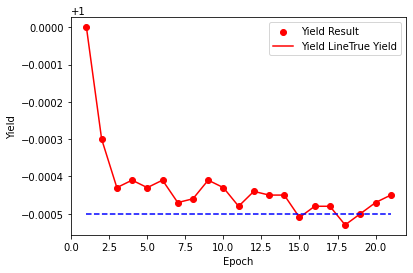

In [90]:
import matplotlib.pyplot as plt

x = list(range(1, len(yield_result) + 1))

plt.scatter(x, yield_result, c="r")
plt.plot(x, yield_result, 'r')
plt.plot(x, [yield_mc for i in range(len(x))], 'b--')
plt.legend([
    "Yield Result",
    "Yield Line"
    "True Yield"
])
plt.xlabel("Epoch")
plt.ylabel("Yield")
plt.show()